## Kyle Ah Von #57862609

This lab report will answer the questions related to the **analysis** portion of the lab manual for distance sensors. 

I am starting with setting up the environment before running any analysis.

In [46]:
## Import libraries
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
from scipy.optimize import curve_fit

# Setup Dataframes
Al_shinydataset = pd.read_excel("ShinyAluminumSlower.xlsx", skiprows = 1)
Al_sanddataset = pd.read_excel("Sandblastedaluminum.xlsx", skiprows = 1)
Steeldataset = pd.read_excel("SteelSampleSlower.xlsx", skiprows = 1)
Acrylicdataset = pd.read_excel("AcrylicSample.xlsx", skiprows = 1)

# Remove duplicate data points
Al_shinydataset = Al_shinydataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Al_sanddataset = Al_sanddataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Steeldataset = Steeldataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])
Acrylicdataset = Acrylicdataset.drop_duplicates(subset=['Reference Distance (mm)', 'IR Sensor (V)', 'Capacitive Sensor (V)', 'Eddy Current Sensor (V)', 'LED Sensor (V)'])

# Split Dataset in forward versus backward motion, where forward is motion towards sensors
Al_shinyswitchidx = Al_shinydataset['Reference Distance (mm)'].idxmin()
Al_shinyforward = Al_shinydataset[Al_shinydataset['Time (s)'] < Al_shinydataset['Time (s)'].iloc[Al_shinyswitchidx]]
Al_shinybackward = Al_shinydataset[Al_shinydataset['Time (s)'] >= Al_shinydataset['Time (s)'].iloc[Al_shinyswitchidx]]

Al_sandswitchidx = Al_sanddataset['Reference Distance (mm)'].idxmin()
Al_sandforward = Al_sanddataset[Al_sanddataset['Time (s)'] < Al_sanddataset['Time (s)'].iloc[Al_sandswitchidx]]
Al_sandbackward = Al_sanddataset[Al_sanddataset['Time (s)'] >= Al_sanddataset['Time (s)'].iloc[Al_sandswitchidx]]

Steelswitchidx = Steeldataset['Reference Distance (mm)'].idxmin()
Steelforward =Steeldataset[Steeldataset['Time (s)'] < Steeldataset['Time (s)'].iloc[Steelswitchidx]]
Steelbackward = Steeldataset[Steeldataset['Time (s)'] >= Steeldataset['Time (s)'].iloc[Steelswitchidx]]

Acrylicswitchidx = Acrylicdataset['Reference Distance (mm)'].idxmin()
Acrylicforward = Acrylicdataset[Acrylicdataset['Time (s)'] < Acrylicdataset['Time (s)'].iloc[Acrylicswitchidx]]
Acrylicbackward = Acrylicdataset[Acrylicdataset['Time (s)'] >= Acrylicdataset['Time (s)'].iloc[Acrylicswitchidx]]




## Question 1
Prepare one graph for each proximity sensor showing the sensor signal for all test targets as a function of distance between the sensor and the test targets. Use the distance measured by the dial gauge as the reference distance.

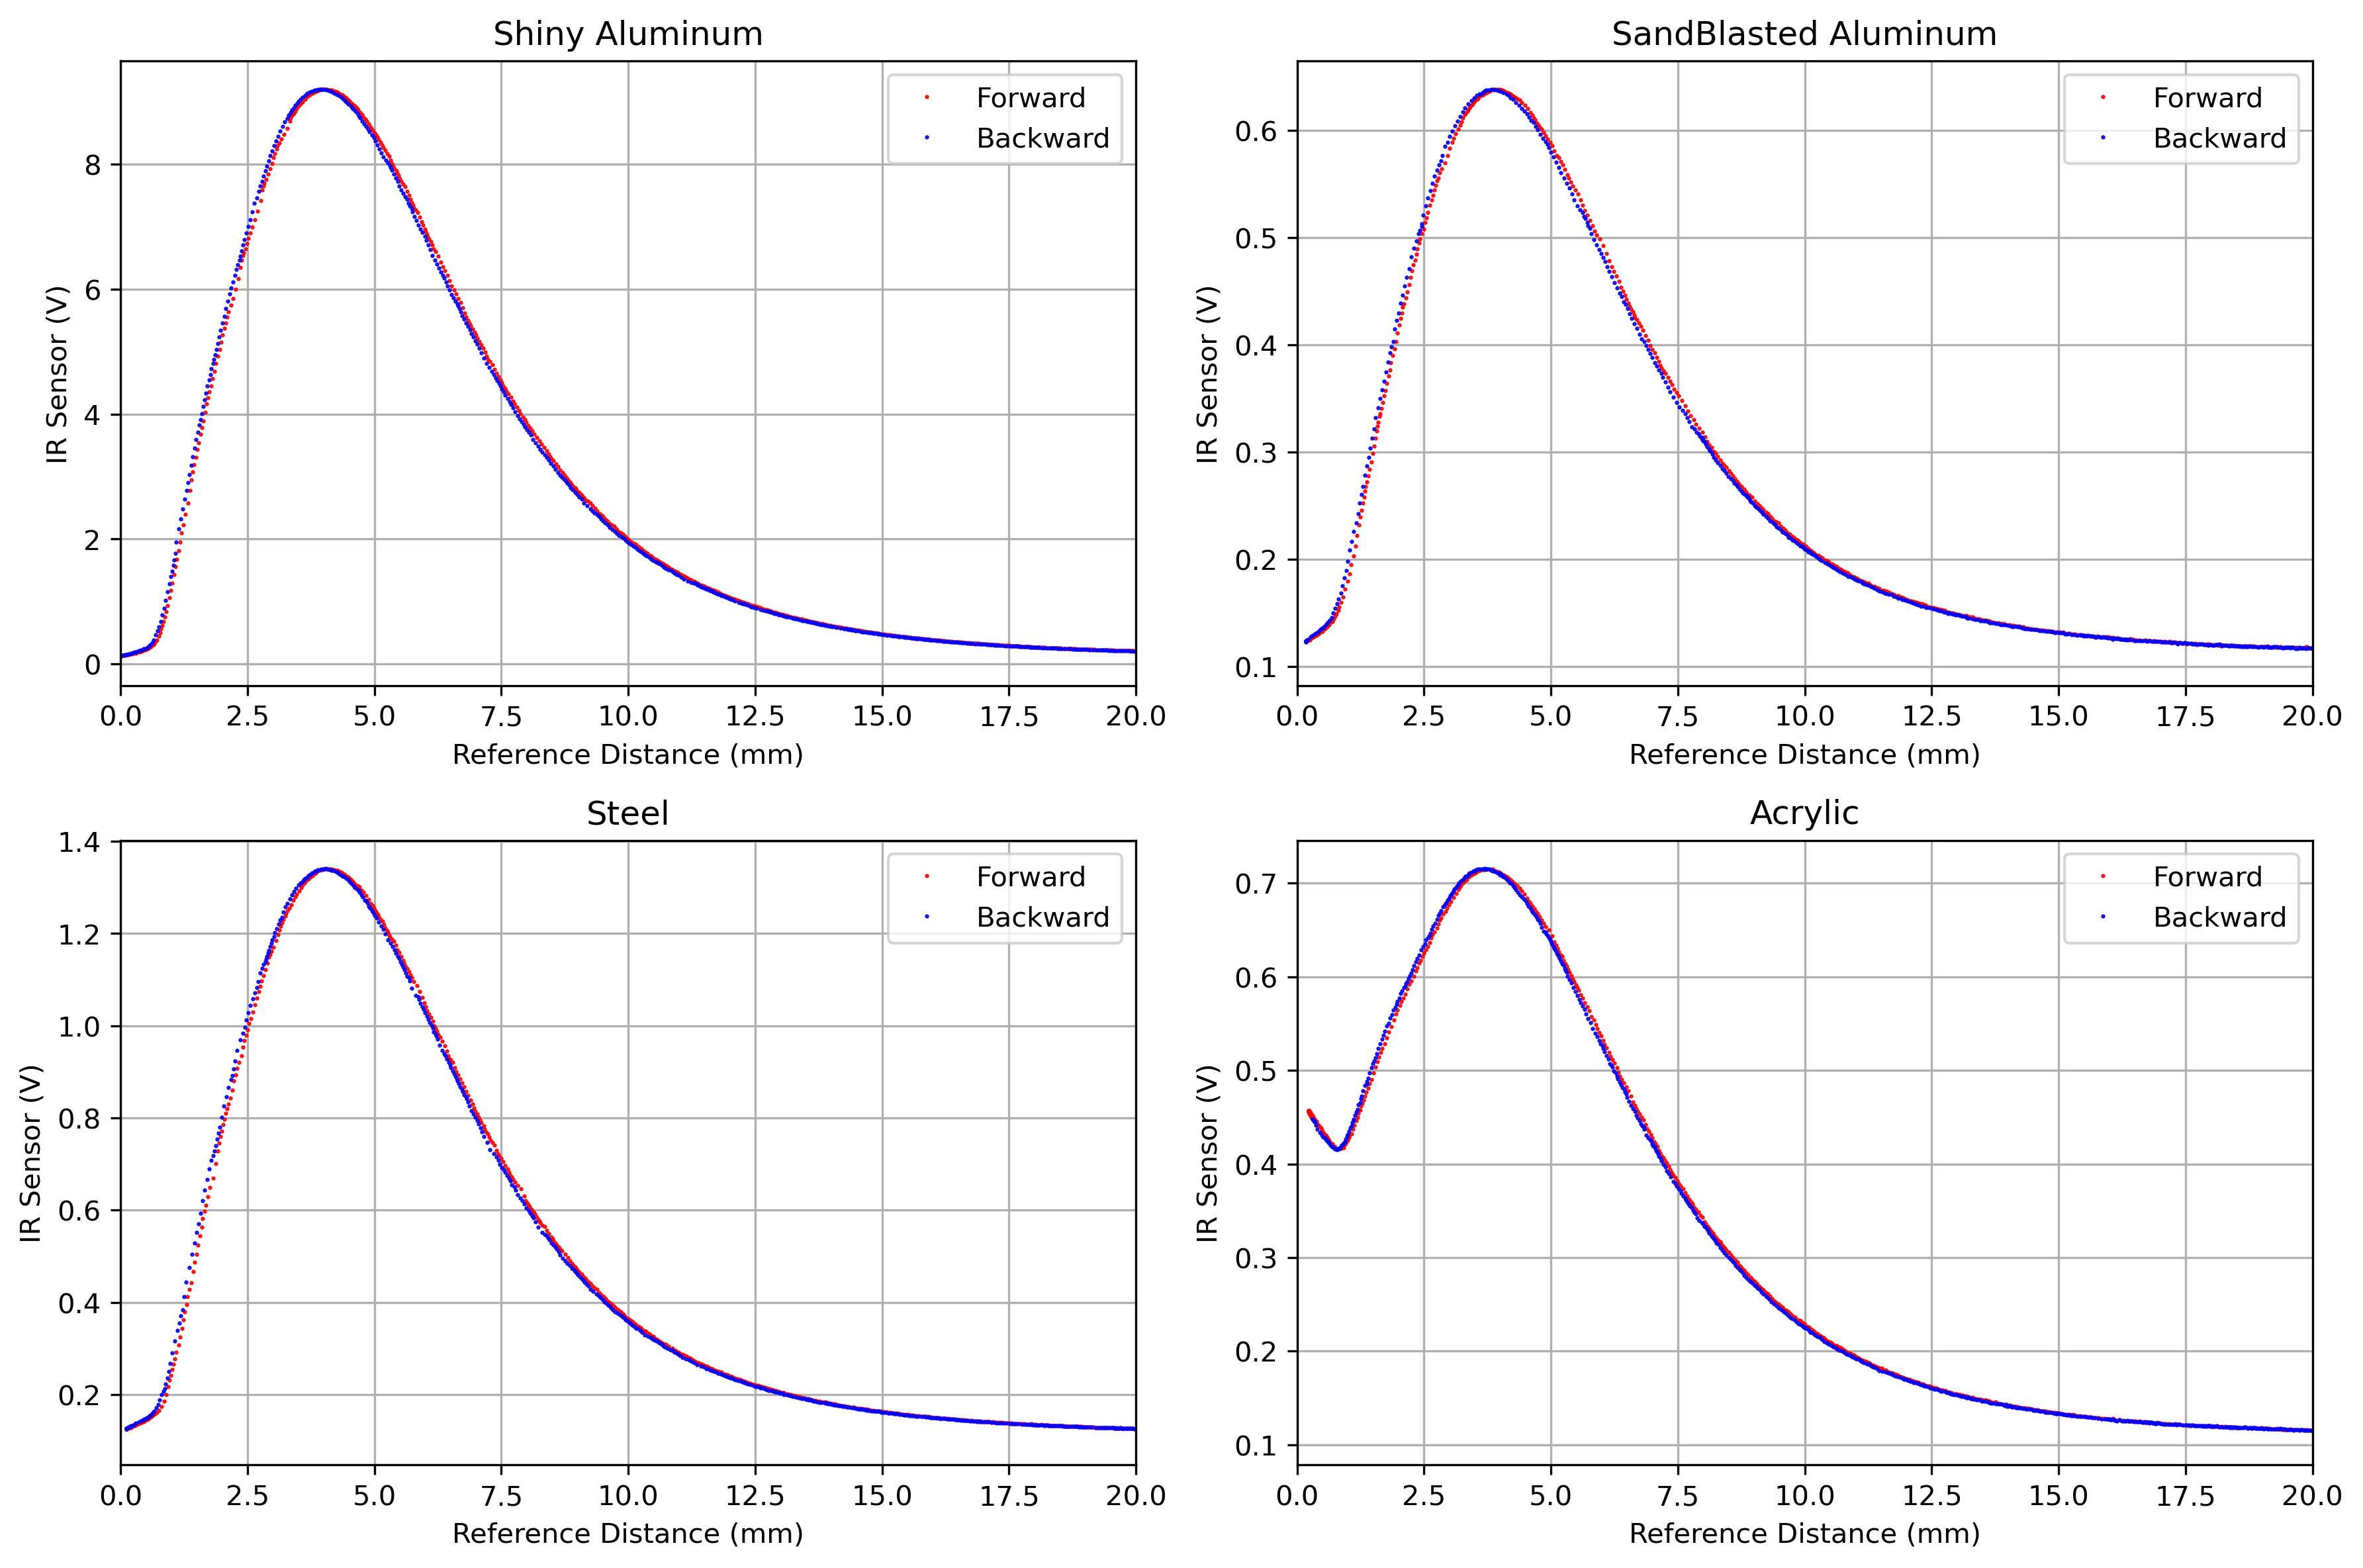

In [72]:
##IR Sensor Graphs
# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Define the range for the x-axis (for example, between 0 and 25)
x_min, x_max = 0, 20
# Plot for Shiny Aluminum
axs[0, 0].plot(Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 0].plot(Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 0].set_title('Shiny Aluminum')
axs[0, 0].set_xlabel('Reference Distance (mm)')
axs[0, 0].set_ylabel('IR Sensor (V)')
axs[0, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for SandBlasted Aluminum
axs[0, 1].plot(Al_sandforward['Reference Distance (mm)'], Al_sandforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 1].plot(Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 1].set_title('SandBlasted Aluminum')
axs[0, 1].set_xlabel('Reference Distance (mm)')
axs[0, 1].set_ylabel('IR Sensor (V)')
axs[0, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for Steel
axs[1, 0].plot(Steelforward['Reference Distance (mm)'], Steelforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 0].plot(Steelbackward['Reference Distance (mm)'], Steelbackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 0].set_title('Steel')
axs[1, 0].set_xlabel('Reference Distance (mm)')
axs[1, 0].set_ylabel('IR Sensor (V)')
axs[1, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Acrylic
axs[1, 1].plot(Acrylicforward['Reference Distance (mm)'], Acrylicforward['IR Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 1].plot(Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['IR Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 1].set_title('Acrylic')
axs[1, 1].set_xlabel('Reference Distance (mm)')
axs[1, 1].set_ylabel('IR Sensor (V)')
axs[1, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



Note that each graph have a different Voltage scale, notably that Shiny Aluminum sample has a bigger range value. 

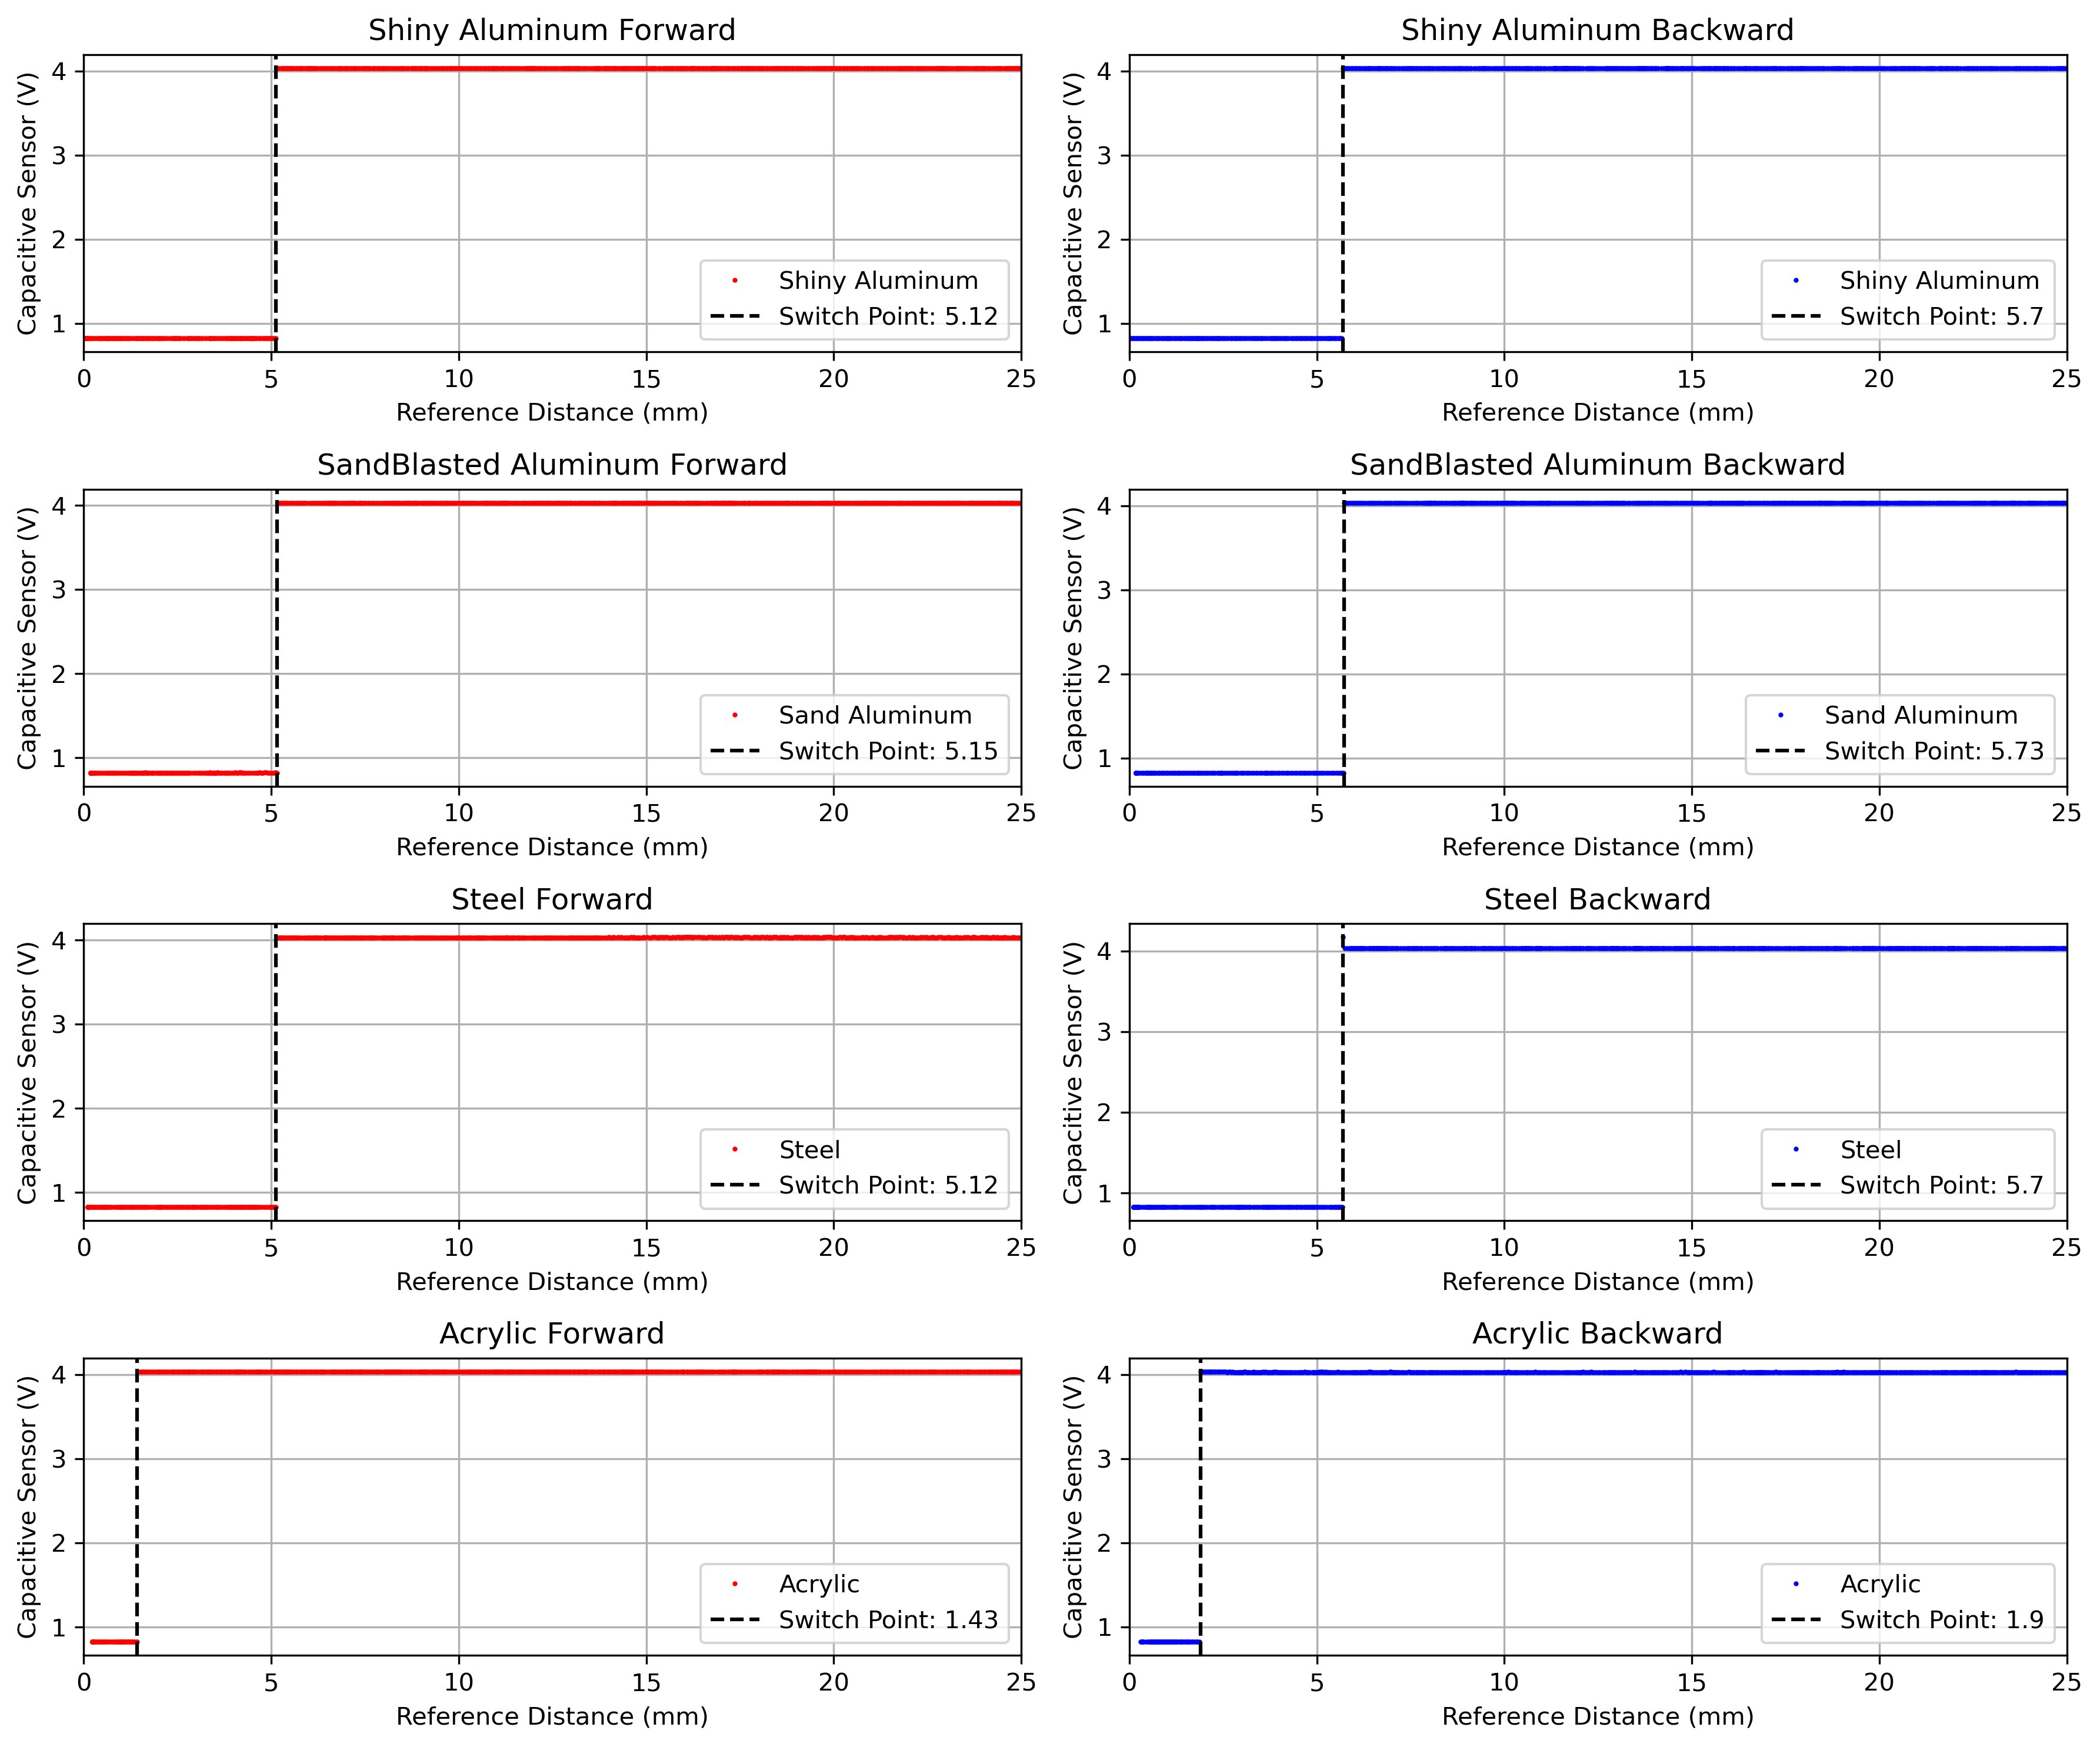

In [57]:
##Capacitive Sensor
# Define the threshold for the switch
threshold = 4.0  # Example threshold for switching from low to high

# Create a figure and a grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 10), dpi=300)  # 4 rows, 2 columns

# Function to plot with vertical line
def plot_with_switch(ax, x_data, y_data, title, color, label):
    ax.plot(x_data, y_data, 'o', color=color, markersize=1, label=label)
    ax.set_xlim([0, 25])  # Restrict x-axis range
    ax.set_title(title)
    ax.set_xlabel('Reference Distance (mm)')
    ax.set_ylabel('Capacitive Sensor (V)')
    
    # Find the index where the sensor value crosses the threshold
    switch_index = np.where(y_data < threshold)[0]  # Get indices where y_data is below threshold
    if switch_index.size > 0:
        switch_value = x_data.iloc[switch_index[0]]  # Get the corresponding x value for the first occurrence
        # Add a vertical line at the switch value
        ax.axvline(switch_value, color='k', linestyle='--', label='Switch Point: ' + str(switch_value))

    ax.grid(True)
    ax.legend()

# Function to plot with vertical line
def plot_with_switch2(ax, x_data, y_data, title, color, label):
    ax.plot(x_data, y_data, 'o', color=color, markersize=1, label=label)
    ax.set_xlim([0, 25])  # Restrict x-axis range
    ax.set_title(title)
    ax.set_xlabel('Reference Distance (mm)')
    ax.set_ylabel('Capacitive Sensor (V)')
    
    # Find the index where the sensor value crosses the threshold
    switch_index = np.where(y_data > 1.0)[0]  # Get indices where y_data is below threshold
    if switch_index.size > 0:
        switch_value = x_data.iloc[switch_index[0]]  # Get the corresponding x value for the first occurrence
        # Add a vertical line at the switch value
        ax.axvline(switch_value, color='k', linestyle='--', label='Switch Point: ' + str(switch_value))

    ax.grid(True)
    ax.legend()

# Plot for Shiny Aluminum
plot_with_switch(axs[0, 0], Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['Capacitive Sensor (V)'], 'Shiny Aluminum Forward', 'r', 'Shiny Aluminum')
plot_with_switch2(axs[0, 1], Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['Capacitive Sensor (V)'], 'Shiny Aluminum Backward', 'b', 'Shiny Aluminum')

# Plot for SandBlasted Aluminum
plot_with_switch(axs[1, 0], Al_sandforward['Reference Distance (mm)'], Al_sandforward['Capacitive Sensor (V)'], 'SandBlasted Aluminum Forward', 'r', 'Sand Aluminum')
plot_with_switch2(axs[1, 1], Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['Capacitive Sensor (V)'], 'SandBlasted Aluminum Backward', 'b', 'Sand Aluminum')

# Plot for Steel
plot_with_switch(axs[2, 0], Steelforward['Reference Distance (mm)'], Steelforward['Capacitive Sensor (V)'], 'Steel Forward', 'r', 'Steel')
plot_with_switch2(axs[2, 1], Steelbackward['Reference Distance (mm)'], Steelbackward['Capacitive Sensor (V)'], 'Steel Backward', 'b', 'Steel')

# Plot for Acrylic
plot_with_switch(axs[3, 0], Acrylicforward['Reference Distance (mm)'], Acrylicforward['Capacitive Sensor (V)'], 'Acrylic Forward', 'r', 'Acrylic')
plot_with_switch2(axs[3, 1], Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['Capacitive Sensor (V)'], 'Acrylic Backward', 'b', 'Acrylic')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



The extract point after the switch point represents the return motion. Which can explain hysteresis. 

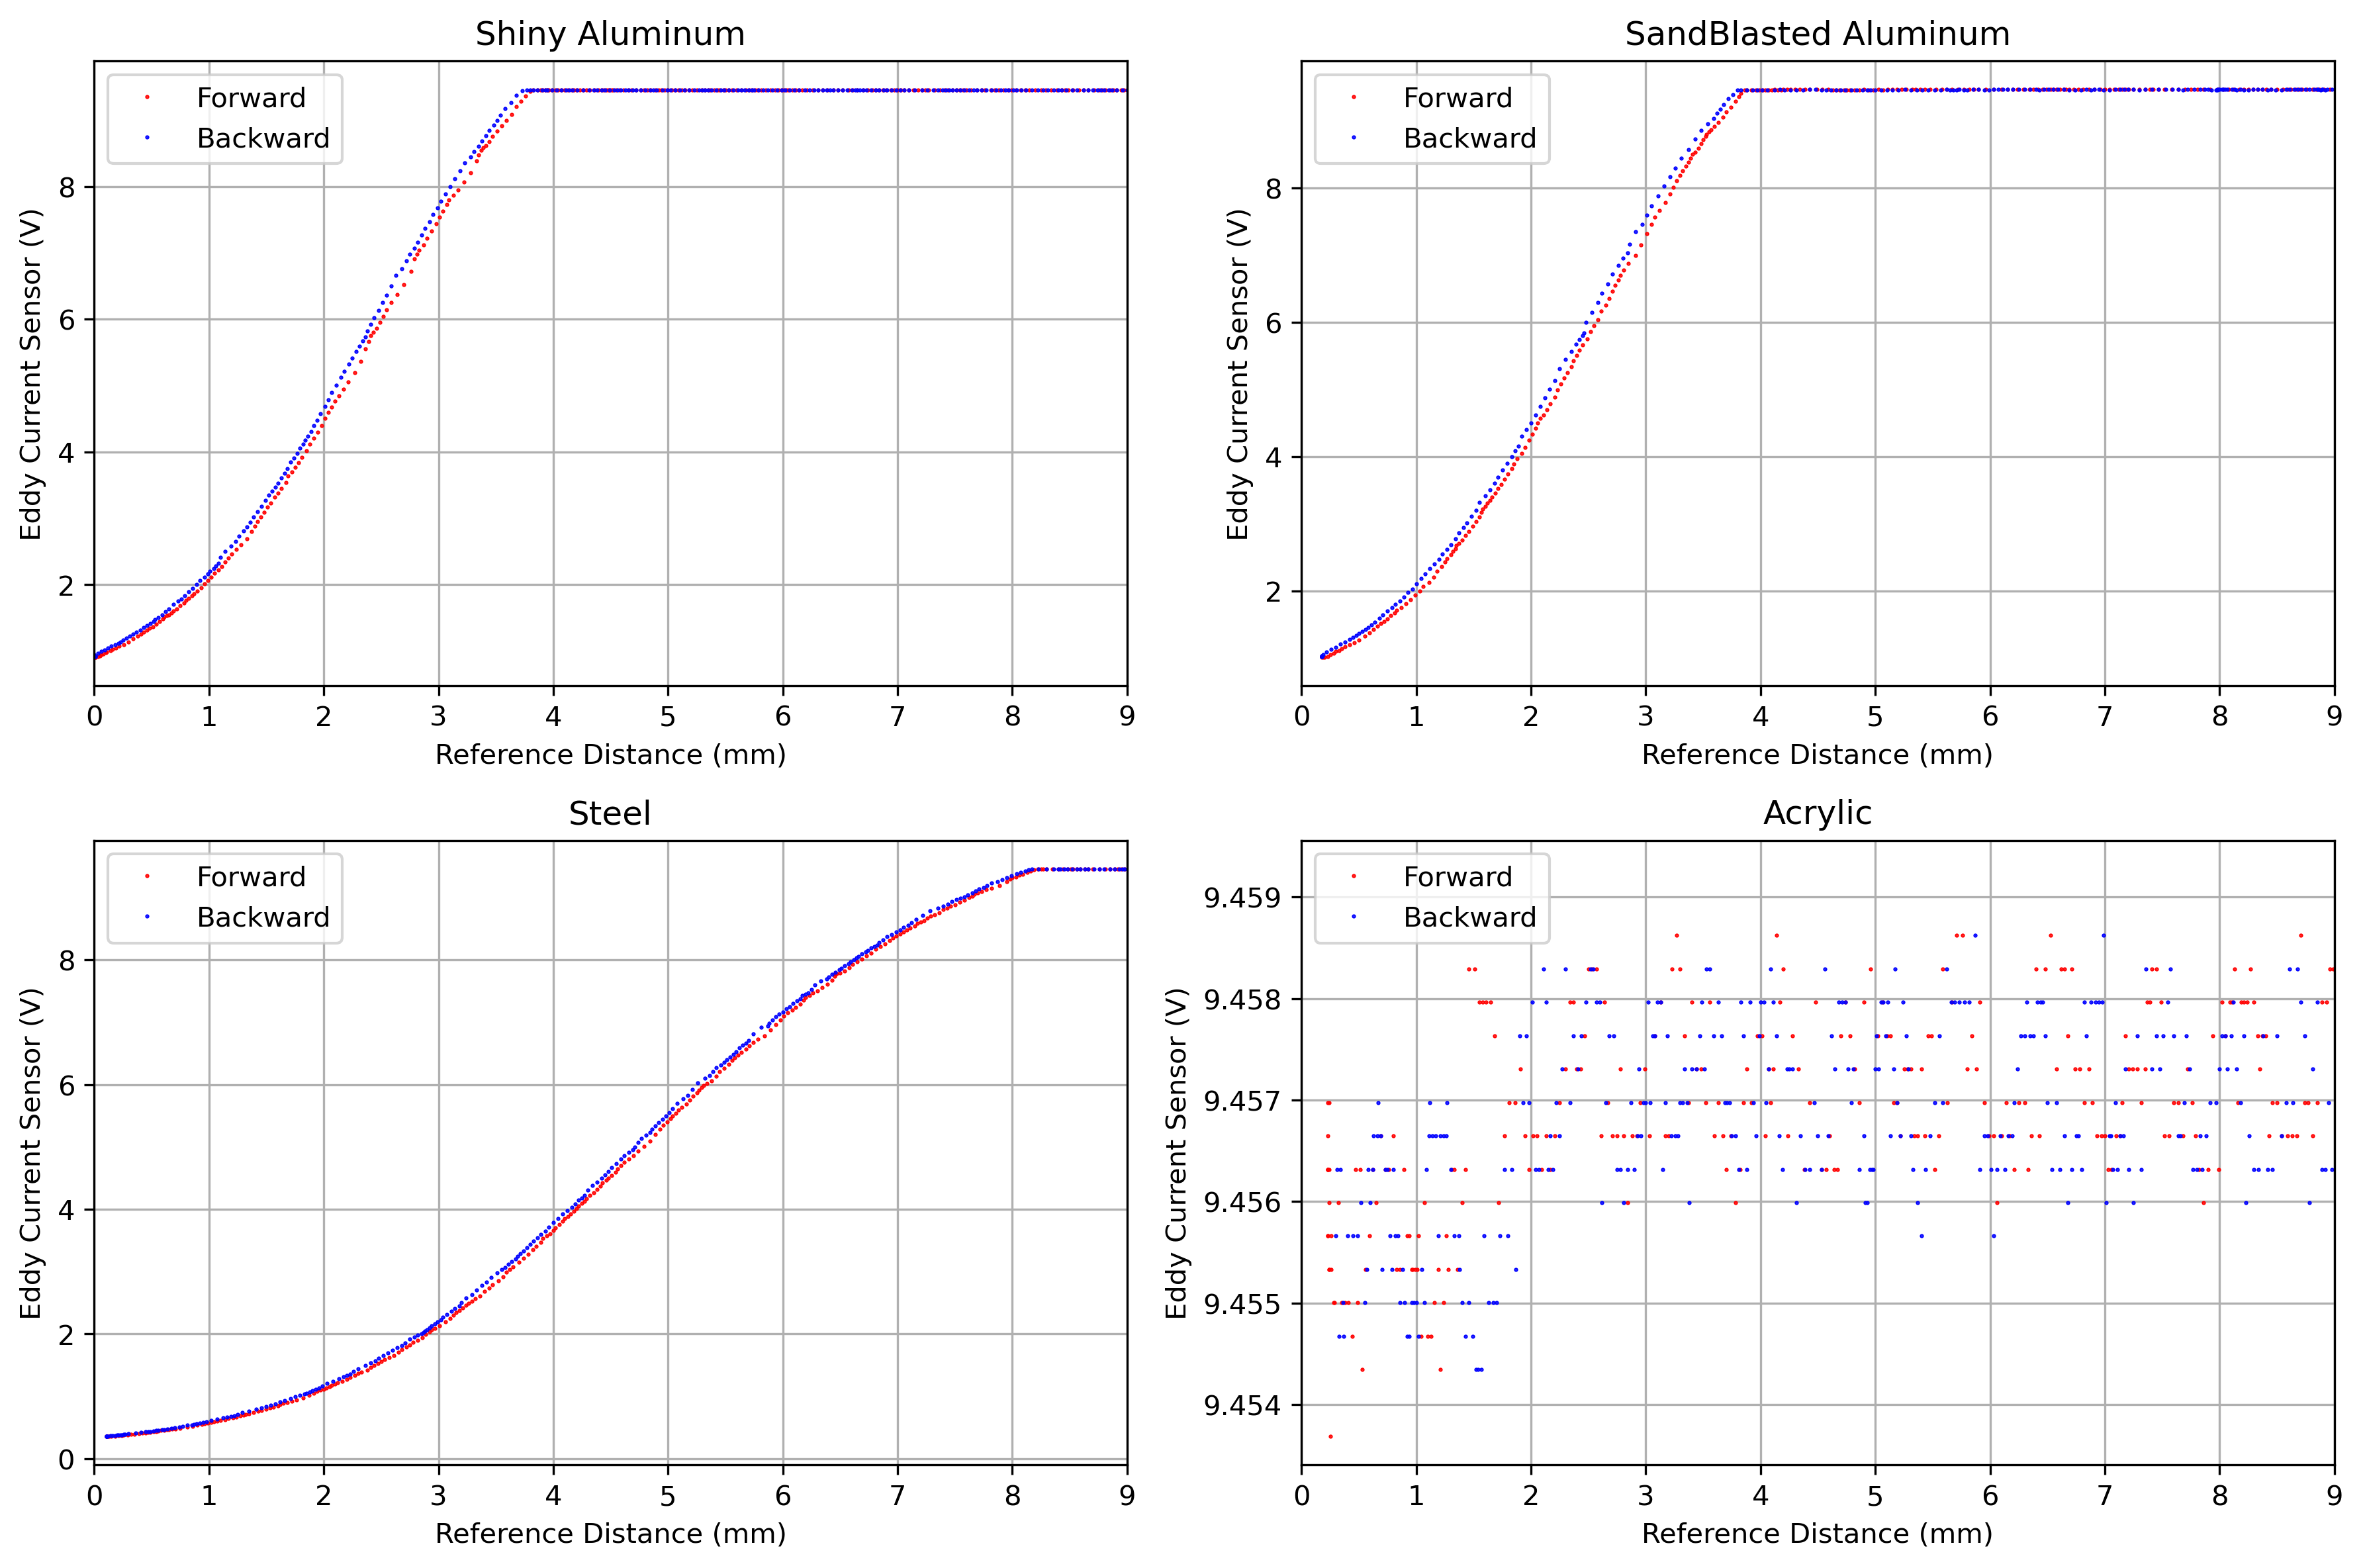

In [68]:
##Eddy Current Sensor Graphs
# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Define the range for the x-axis (for example, between 0 and 25)
x_min, x_max = 0, 9

# Plot for Shiny Aluminum
axs[0, 0].plot(Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 0].plot(Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 0].set_title('Shiny Aluminum')
axs[0, 0].set_xlabel('Reference Distance (mm)')
axs[0, 0].set_ylabel('Eddy Current Sensor (V)')
axs[0, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for SandBlasted Aluminum
axs[0, 1].plot(Al_sandforward['Reference Distance (mm)'], Al_sandforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 1].plot(Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 1].set_title('SandBlasted Aluminum')
axs[0, 1].set_xlabel('Reference Distance (mm)')
axs[0, 1].set_ylabel('Eddy Current Sensor (V)')
axs[0, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for Steel
axs[1, 0].plot(Steelforward['Reference Distance (mm)'], Steelforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 0].plot(Steelbackward['Reference Distance (mm)'], Steelbackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 0].set_title('Steel')
axs[1, 0].set_xlabel('Reference Distance (mm)')
axs[1, 0].set_ylabel('Eddy Current Sensor (V)')
axs[1, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Acrylic
axs[1, 1].plot(Acrylicforward['Reference Distance (mm)'], Acrylicforward['Eddy Current Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 1].plot(Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['Eddy Current Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 1].set_title('Acrylic')
axs[1, 1].set_xlabel('Reference Distance (mm)')
axs[1, 1].set_ylabel('Eddy Current Sensor (V)')
axs[1, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

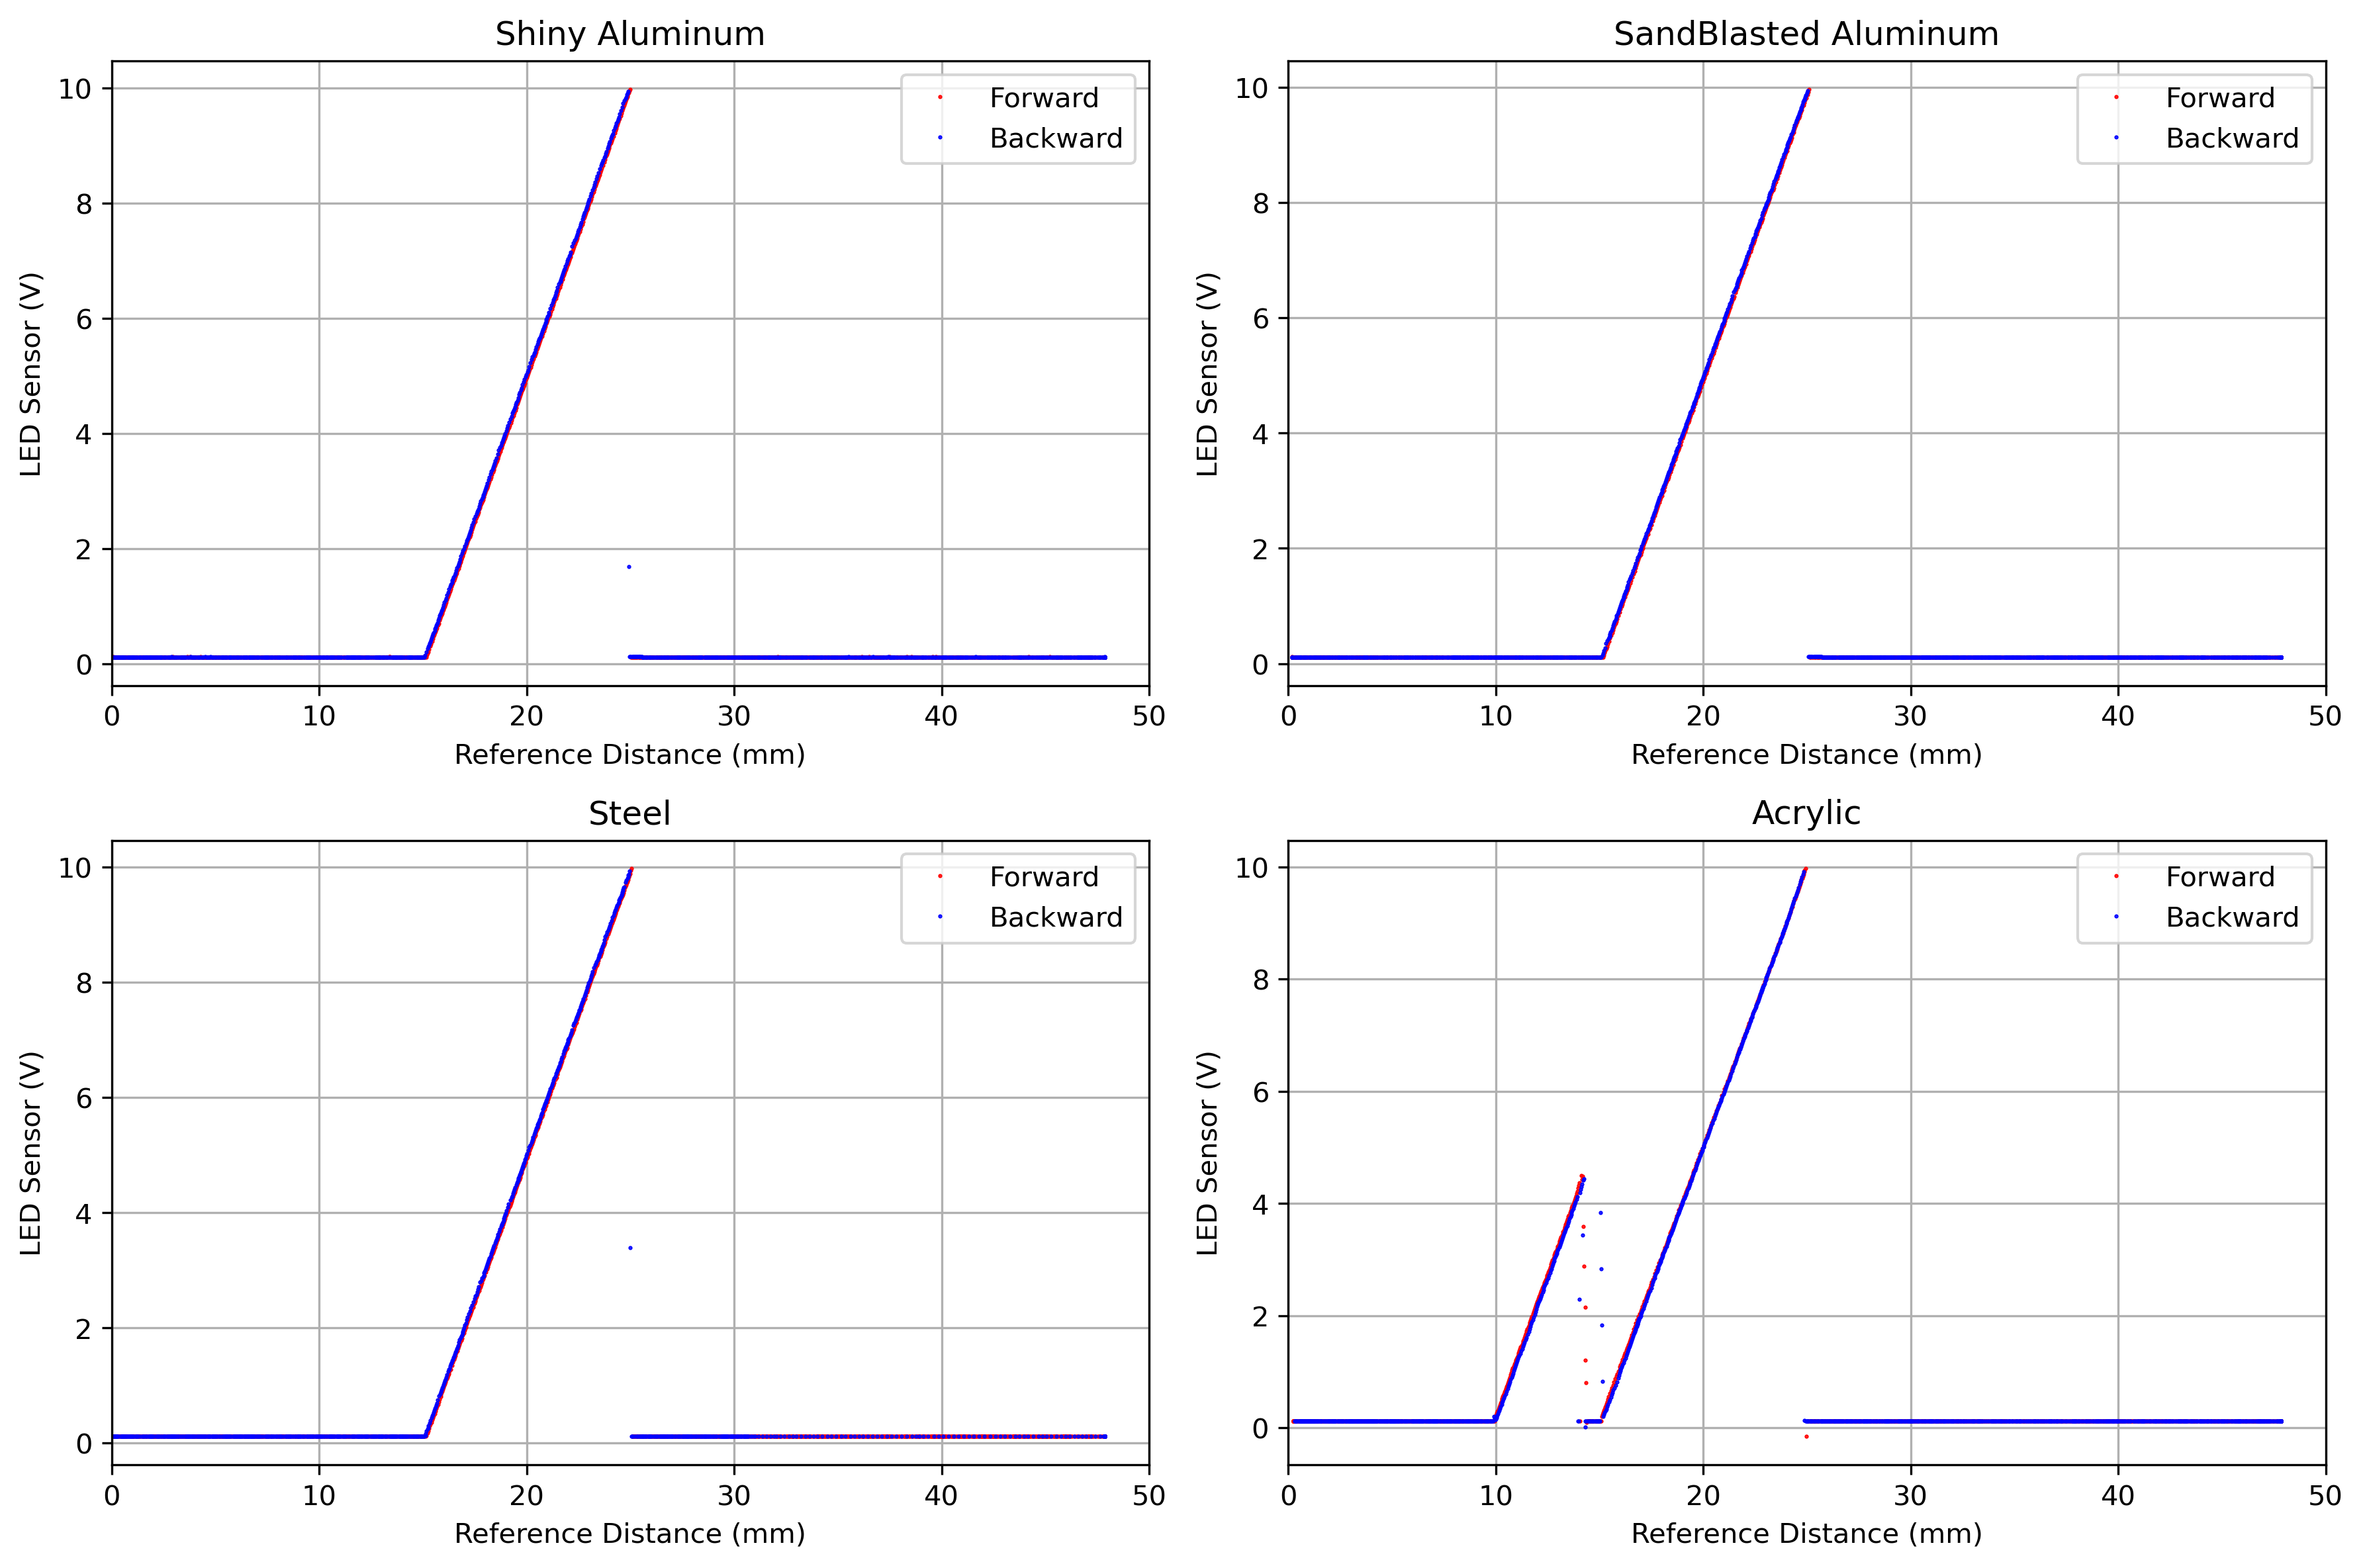

In [78]:
##LED Sensor Graphs
# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Define the range for the x-axis (for example, between 0 and 25)
x_min, x_max = 0, 50

# Plot for Shiny Aluminum
axs[0, 0].plot(Al_shinyforward['Reference Distance (mm)'], Al_shinyforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 0].plot(Al_shinybackward['Reference Distance (mm)'], Al_shinybackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 0].set_title('Shiny Aluminum')
axs[0, 0].set_xlabel('Reference Distance (mm)')
axs[0, 0].set_ylabel('LED Sensor (V)')
axs[0, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for SandBlasted Aluminum
axs[0, 1].plot(Al_sandforward['Reference Distance (mm)'], Al_sandforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[0, 1].plot(Al_sandbackward['Reference Distance (mm)'], Al_sandbackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[0, 1].set_title('SandBlasted Aluminum')
axs[0, 1].set_xlabel('Reference Distance (mm)')
axs[0, 1].set_ylabel('LED Sensor (V)')
axs[0, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for Steel
axs[1, 0].plot(Steelforward['Reference Distance (mm)'], Steelforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 0].plot(Steelbackward['Reference Distance (mm)'], Steelbackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 0].set_title('Steel')
axs[1, 0].set_xlabel('Reference Distance (mm)')
axs[1, 0].set_ylabel('LED Sensor (V)')
axs[1, 0].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Acrylic
axs[1, 1].plot(Acrylicforward['Reference Distance (mm)'], Acrylicforward['LED Sensor (V)'], 'o', color='r', markersize=0.5, label='Forward')
axs[1, 1].plot(Acrylicbackward['Reference Distance (mm)'], Acrylicbackward['LED Sensor (V)'], 'o', color='b', markersize=0.5, label='Backward')
axs[1, 1].set_title('Acrylic')
axs[1, 1].set_xlabel('Reference Distance (mm)')
axs[1, 1].set_ylabel('LED Sensor (V)')
axs[1, 1].set_xlim([x_min, x_max])  # Restrict x-axis range
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()